# Phase 1: グラフ構造に慣れる

このノートブックでは、NetworkXを使ってグラフの基本的な構造と操作に慣れます。

## 目標
- グラフの直感的理解
- ノード・エッジの作成と操作
- グラフの可視化

## ライブラリのインポート

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from pathlib import Path

# プロジェクトのユーティリティをインポート
import sys
sys.path.insert(0, '../')

from src.data_handler import save_json, load_json
from src.utils import get_data_dir

## 設定

In [2]:
# データ出力ディレクトリ
output_dir = get_data_dir(phase=1)
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Output directory: {output_dir}")

Output directory: /home/tok41/projects/try-graph-rag/notebooks/../data/phase_1_outputs


## グラフの作成と操作

In [3]:
# グラフオブジェクトの宣言
G = nx.Graph()  # 無向グラフのインスタンスを生成
  # 有向グラフを作るなら、 nx.DiGraph()

# ノードの追加
G.add_node("A")
G.add_nodes_from(["B", "C", "D"]) # 複数のノードを追加する

# エッジの追加
G.add_edge("A", "B")
G.add_edges_from([("B", "C"), ("C", "D"), ("D", "A")])
G.add_edge("A", "C")

print(f"Nodes: {list(G.nodes())}")
print(f"Edges: {list(G.edges())}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'C'), ('C', 'D')]
Number of nodes: 4
Number of edges: 5


## グラフの可視化

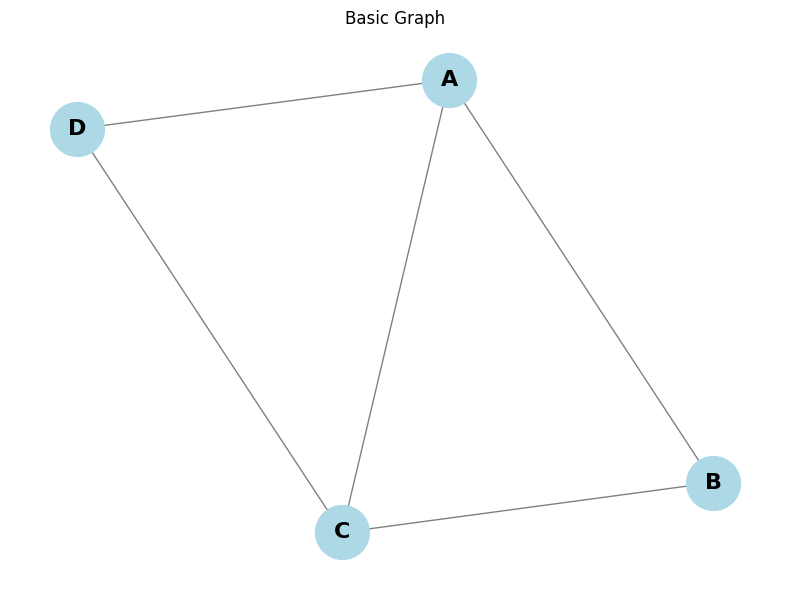

In [4]:
# グラフを描画
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)   # ノードの配置アルゴリズムの指定
nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=16, font_weight='bold', edge_color='gray')
ax.set_title("Basic Graph")
ax.axis('off')
fig.tight_layout()
plt.show()

## 結果の保存

In [5]:
# グラフをJSON形式で保存
graph_data = {
    "nodes": list(G.nodes()),
    "edges": [(u, v) for u, v in G.edges()]
}

output_file = output_dir / "graph_basic.json"
save_json(graph_data, output_file)

print(f"Graph saved to {output_file}")

Graph saved to /home/tok41/projects/try-graph-rag/notebooks/../data/phase_1_outputs/graph_basic.json
